# **The E-Scooter Trips Dataset**

The City of Chicago has done a great job in documenting the dataset, In this dataset, There is a total of **711K rows and 18 columns**.Each of the rows represents a trip. The data points that we are particularly interested in is the **Start Time, End Time, Trip Distance** (in meters), **Trip Duration** (in seconds), **Coordinates** (for the start and the end of the trip), and the **Community** areas where the trips were started and ended.
Out of privacy concerns, the dataset has been manipulated slightly and is not completely accurate. For instance, the Start- and End Times are rounded up to the nearest hour. With regards to geographical locations, the exact latitude and longitude points are not provided. Instead, the centre location of the census tract of where the trip started is given. If the census tract is not available for the row, then the location is set to the center of the community area. In other words, locations and start- and end times are not accurate.

The insight that can be obtained from this dataset is:
1. Vendor rides proportions by trip count & by Distance.
2. Total Trip distance per day and for each Vendor.
3. Number of rides per weekday for each Vendor.
4. Number of trips per hour & trip distance per hour for each Vendor.
5. Boxplot plotting for Trip Distance , Duration & Hour.

## 1- Importing the required packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt

## 2- Importing Dataset and checking for missing values & data type

In [2]:
df = pd.read_csv("D:\Datasets\E-scooter trips 2020\E-Scooter_Trips_-_2020.csv",parse_dates=['Start Time','End Time'])

In [3]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630816 entries, 0 to 630815
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Trip ID                      630816 non-null  object        
 1   Start Time                   630816 non-null  datetime64[ns]
 2   End Time                     630816 non-null  datetime64[ns]
 3   Trip Distance                630816 non-null  object        
 4   Trip Duration                630816 non-null  object        
 5   Vendor                       630816 non-null  object        
 6   Start Community Area Number  629934 non-null  float64       
 7   End Community Area Number    629598 non-null  float64       
 8   Start Community Area Name    629934 non-null  object        
 9   End Community Area Name      629598 non-null  object        
 10  Start Centroid Latitude      629934 non-null  float64       
 11  Start Centroid Longitude  

(630816, 16)

In [24]:
print(df.isna().sum())
df.isna().sum().sum()/df.shape[0] *100

level_0                        0
index                          0
Trip ID                        0
Start Time                     0
End Time                       0
Trip Distance                  0
Trip Duration                  0
Vendor                         0
Start Community Area Number    0
End Community Area Number      0
Start Community Area Name      0
End Community Area Name        0
Start Centroid Latitude        0
Start Centroid Longitude       0
Start Centroid Location        0
End Centroid Latitude          0
End Centroid Longitude         0
End Centroid Location          0
Trip Duration (min)            0
Trip Distance (km)             0
Trip Duration (h)              0
Avg. Speed (km/h)              0
Day                            0
Hour                           0
dtype: int64


0.0

Since the number of missing data is neglectible compared with the total data (less than 5%) we can drop them

In [5]:
df= df.dropna(how='any')

Quick look at the data...

In [6]:
df.head()

,Trip ID,Start Time,End Time,Trip Distance,Trip Duration,Vendor,Start Community Area Number,End Community Area Number,Start Community Area Name,End Community Area Name,Start Centroid Latitude,Start Centroid Longitude,Start Centroid Location,End Centroid Latitude,End Centroid Longitude,End Centroid Location
0,3eb9a2a3-3266-4559-b1ec-e83a6f7972ab,2020-08-12 05:00:00,2020-08-12 05:00:00,"1,153","1,027",spin,68.0,68.0,ENGLEWOOD,ENGLEWOOD,41.780068,-87.642266,POINT (-87.64226608 41.78006847),41.780068,-87.642266,POINT (-87.64226608 41.78006847)
1,82dd7b8f-8de0-4f25-829b-b32bf47e8419,2020-08-12 05:00:00,2020-08-12 05:00:00,17,91,spin,22.0,21.0,LOGAN SQUARE,AVONDALE,41.922903,-87.704301,POINT (-87.70430082 41.92290349),41.939283,-87.710757,POINT (-87.71075685 41.93928256)
2,9120cbf3-f749-49b6-b894-0e6e065cd731,2020-08-12 05:00:00,2020-08-12 05:00:00,"2,883",724,spin,3.0,6.0,UPTOWN,LAKE VIEW,41.965435,-87.655145,POINT (-87.65514456 41.96543532),41.943514,-87.657498,POINT (-87.65749768 41.9435138)
3,cf2e4abc-2649-49be-924b-468a1aefc4c8,2020-08-12 05:00:00,2020-08-12 05:00:00,5,21,spin,31.0,31.0,LOWER WEST SIDE,LOWER WEST SIDE,41.848335,-87.675179,POINT (-87.67517932 41.84833501),41.848335,-87.675179,POINT (-87.67517932 41.84833501)
4,0448afb5-ab64-4090-b528-e3050e7eb0f2,2020-08-12 07:00:00,2020-08-12 07:00:00,"1,179",245,spin,6.0,6.0,LAKE VIEW,LAKE VIEW,41.943514,-87.657498,POINT (-87.65749768 41.9435138),41.943514,-87.657498,POINT (-87.65749768 41.9435138)


Trip distance and Duration has commas and it should be removed then converted to integer type.

In [7]:
df['Trip Distance'] = df['Trip Distance'].str.replace(",","").astype('int')
df['Trip Duration'] = df['Trip Duration'].str.replace(",","").astype('int')

Trip Distance & Duration has been converted to integer type data...

## 3- Check for duplicated values

In [8]:
print(df.duplicated().value_counts(),"\n -------------")
print(df.nunique())


False    629175
dtype: int64 
 -------------
Trip ID                        629175
Start Time                       2272
End Time                         2441
Trip Distance                   22225
Trip Duration                    9220
Vendor                              3
Start Community Area Number        77
End Community Area Number          77
Start Community Area Name          77
End Community Area Name            77
Start Centroid Latitude            77
Start Centroid Longitude           77
Start Centroid Location            77
End Centroid Latitude              77
End Centroid Longitude             77
End Centroid Location              77
dtype: int64


No dublicated values found ...Proceed with data cleaning..

In [9]:
df['Trip Duration (min)'] = df['Trip Duration']/60
df['Trip Distance (km)']=df['Trip Distance']/1000
df['Trip Duration (h)'] = df['Trip Duration (min)']/60
df['Avg. Speed (km/h)'] = df['Trip Distance (km)']/df['Trip Duration (h)']

## 4-Checking for unusual values or unreal values...

In [10]:
df.describe()

,Trip Distance,Trip Duration,Start Community Area Number,End Community Area Number,Start Centroid Latitude,Start Centroid Longitude,End Centroid Latitude,End Centroid Longitude,Trip Duration (min),Trip Distance (km),Trip Duration (h),Avg. Speed (km/h)
count,629175.000000,629175.000000,629175.000000,629175.000000,629175.000000,629175.000000,629175.000000,629175.000000,629175.000000,629175.000000,629175.000000,6.291750e+05
mean,2905.926094,993.401151,24.030281,24.078792,41.891447,-87.666418,41.891551,-87.666667,16.556686,2.905926,0.275945,inf
std,3707.496669,1352.792422,20.925770,20.944270,0.071606,0.040472,0.071702,0.040657,22.546540,3.707497,0.375776,NaN
min,1.000000,0.000000,1.000000,1.000000,41.657890,-87.909363,41.657890,-87.909363,0.000000,0.001000,0.000000,3.315222e-04
25%,822.000000,305.000000,7.000000,7.000000,41.858714,-87.684893,41.858714,-87.684893,5.083333,0.822000,0.084722,5.820737e+00
50%,1868.000000,570.000000,22.000000,22.000000,41.921880,-87.657498,41.921880,-87.657498,9.500000,1.868000,0.158333,1.165772e+01
75%,3641.000000,1125.000000,33.000000,33.000000,41.943514,-87.645647,41.943514,-87.645647,18.750000,3.641000,0.312500,1.624865e+01
max,49997.000000,204182.000000,77.000000,77.000000,42.008889,-87.534280,42.008889,-87.534280,3403.033333,49.997000,56.717222,inf


I Found some unrealistic values..(i.e. 0 second trip duration, more than 50 hours long trip !!)
It should be cleaned further..So i'll remove trips with less than 90 sec or more than 120 min in duration also less than 100 m in Distance will be discarded.

In [11]:
df = df.drop(df[(df['Trip Duration'] < 90) | (df['Trip Distance'] < 100) | (df['Trip Duration (min)'] > 120)].index).reset_index()
# df= df[df['Trip Duration (min)'] <120].reset_index()
# df= df.drop(df[df['Trip Duration (min)'] >120]).reset_index()
# del df['index'] , df['level_0']
df[['Trip Duration (min)','Trip Distance (km)','Avg. Speed (km/h)']].describe()

,Trip Duration (min),Trip Distance (km),Avg. Speed (km/h)
count,546267.000000,546267.000000,546267.000000
mean,16.749666,3.198990,14.205701
std,17.583272,3.520952,16.251474
min,1.500000,0.100000,0.059278
25%,6.133333,1.180000,8.417213
50%,10.566667,2.167000,12.817158
75%,19.883333,3.944000,16.956425
max,120.000000,49.997000,786.665455


Looking at the Max speed (786 km/h !!) is not realistic at all, as the fastest speed a rental scooter can go is 30 km/h. So the data needs more cleaning.
I'll set the limit to 40 km/h since scooters can reach 40 km/h on downhills.

In [12]:
df = df[df['Avg. Speed (km/h)']<40].reset_index()
df.describe()

,level_0,index,Trip Distance,Trip Duration,Start Community Area Number,End Community Area Number,Start Centroid Latitude,Start Centroid Longitude,End Centroid Latitude,End Centroid Longitude,Trip Duration (min),Trip Distance (km),Trip Duration (h),Avg. Speed (km/h)
count,537794.000000,537794.000000,537794.000000,537794.000000,537794.000000,537794.000000,537794.000000,537794.000000,537794.000000,537794.000000,537794.000000,537794.000000,537794.000000,537794.000000
mean,272319.162387,320955.231589,3050.997097,1010.761866,23.579839,23.632071,41.893208,-87.666346,41.893328,-87.666630,16.846031,3.050997,0.280767,13.090996
std,158033.283033,181690.283216,3071.691853,1060.621442,20.802459,20.825790,0.070747,0.039962,0.070856,0.040168,17.677024,3.071692,0.294617,7.062379
min,0.000000,0.000000,100.000000,90.000000,1.000000,1.000000,41.657890,-87.909363,41.657890,-87.909363,1.500000,0.100000,0.025000,0.059278
25%,135240.250000,164325.500000,1167.000000,369.000000,6.000000,6.000000,41.874254,-87.684893,41.874254,-87.684893,6.150000,1.167000,0.102500,8.331634
50%,271242.500000,322476.500000,2131.000000,637.000000,21.000000,21.000000,41.921880,-87.657498,41.921880,-87.657498,10.616667,2.131000,0.176944,12.699478
75%,409602.750000,479277.500000,3841.000000,1200.000000,31.000000,31.000000,41.943514,-87.645647,41.943514,-87.645647,20.000000,3.841000,0.333333,16.722581
max,546266.000000,630815.000000,49990.000000,7200.000000,77.000000,77.000000,42.008889,-87.534280,42.008889,-87.534280,120.000000,49.990000,2.000000,39.998298


## 5- Plotting vendor rides proportions by trip count & by Distance

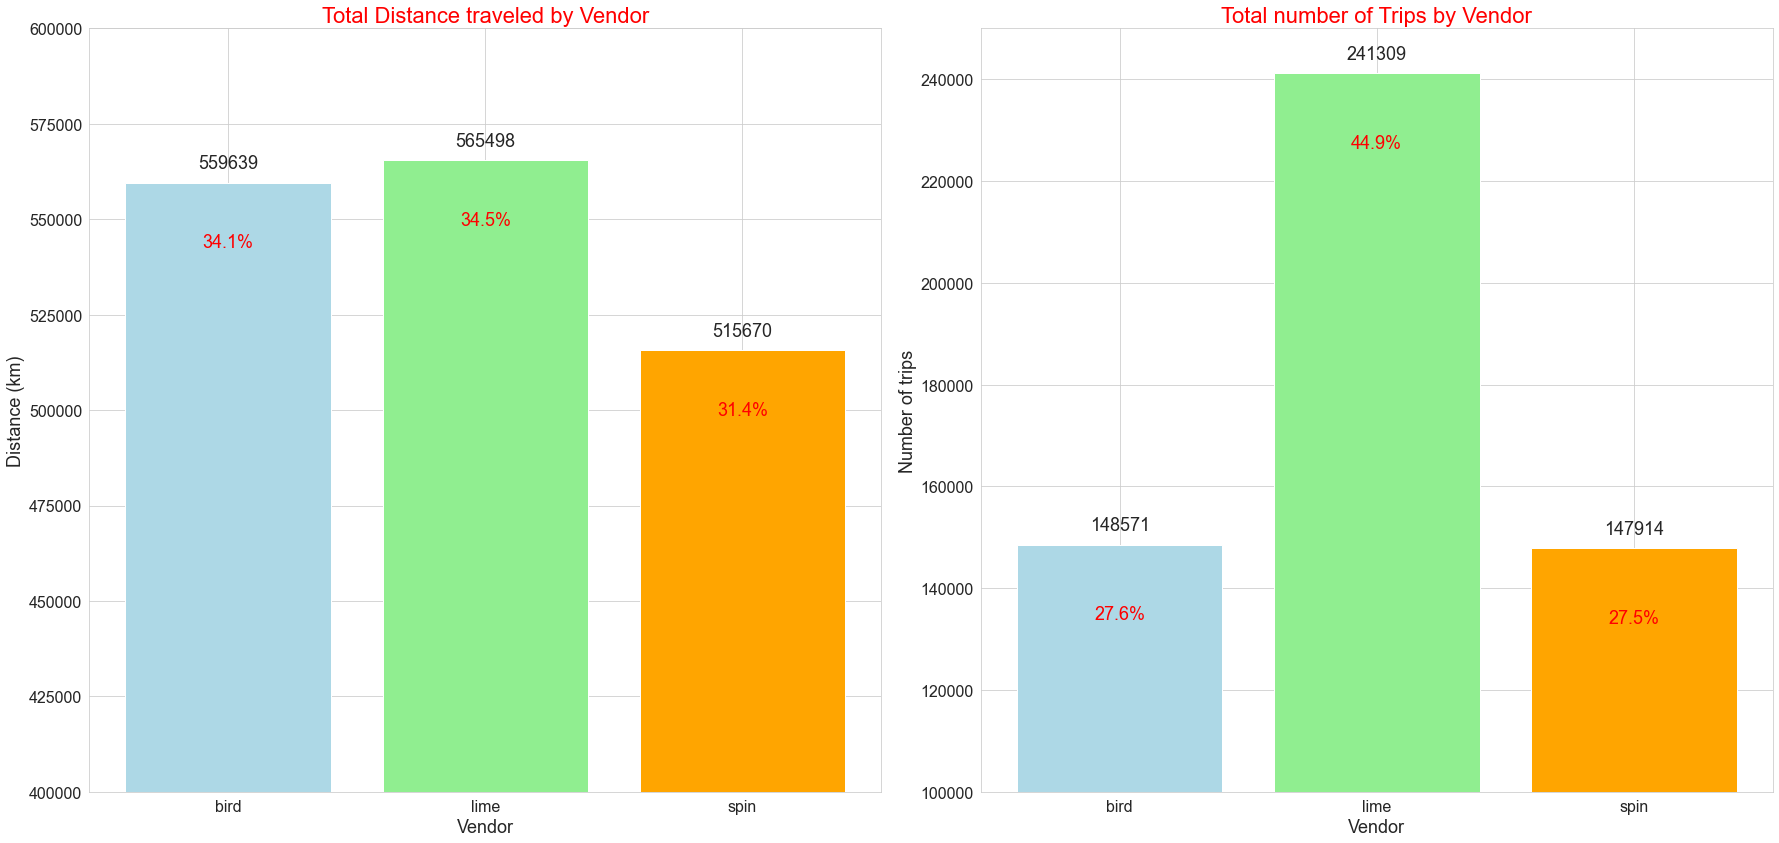

In [25]:
df_by_vendor = df.groupby('Vendor').sum().reset_index()
df_by_vendor_count = df.groupby('Vendor').count().reset_index()
df_by_vendor_count.rename(columns={'Trip ID':'Trip'},inplace=True)
fig,ax = plt.subplots(1,2)
plt.rcParams["figure.figsize"] = (25,12)

#First plot
first = ax[0].bar(df_by_vendor['Vendor'],df_by_vendor['Trip Distance (km)'],color=['lightblue','lightgreen','orange'])
ax[0].set_ylim(400000,600000)
ax[0].set_title("Total Distance traveled by Vendor",size=22,c='r')
ax[0].set_xlabel('Vendor',size=18)
ax[0].set_ylabel('Distance (km)',size=18)

#second plot
second= ax[1].bar(df_by_vendor_count['Vendor'],df_by_vendor_count['Trip'],color=['lightblue','lightgreen','orange'])
ax[1].set_title("Total number of Trips by Vendor",size=22,c='r')
ax[1].set_ylim(100000,250000)
ax[1].set_xlabel('Vendor',size=18)
ax[1].set_ylabel('Number of trips',size=18)

#Annotations
for bar in ax[0].patches:
    ax[0].annotate(format((bar.get_height()/df['Trip Distance (km)'].sum())*100 ,'.1f') +'%' ,
                   (bar.get_x() + bar.get_width() / 2., bar.get_height()),
                   ha = 'center', va = 'center',
                   size=18,
                   xytext = (0, -60),
                   textcoords = 'offset points',c='r')

for bar in ax[1].patches:
    ax[1].annotate(format((bar.get_height()/df_by_vendor_count['Trip'].sum())*100 ,'.1f') +'%' ,
                   (bar.get_x() + bar.get_width() / 2., bar.get_height()),
                   ha = 'center', va = 'center',
                   size=18,
                   xytext = (0, -70),
                   textcoords = 'offset points',c='r')

ax[0].bar_label(first, padding=10,size=18)
ax[1].bar_label(second,padding = 10,size=18)
plt.tight_layout()
plt.show()

Adding weekdays to the dataframe...

In [14]:
weekends =[]
for i in range(0,len(df['Start Time'])):
    if df['Start Time'][i].day_name() in ["Saturday" , "Sunday"]:
        weekends.append(df['Start Time'][i].date())


In [15]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Day'] = df['Start Time'].dt.day_name()
df_by_day = df.groupby(['Vendor','Day']).count().reset_index()
print(df_by_day)


   Vendor        Day  level_0  index  Trip ID  Start Time  End Time  \
0    bird     Friday    24594  24594    24594       24594     24594   
1    bird     Monday    17928  17928    17928       17928     17928   
2    bird   Saturday    27543  27543    27543       27543     27543   
3    bird     Sunday    23403  23403    23403       23403     23403   
4    bird   Thursday    19378  19378    19378       19378     19378   
5    bird    Tuesday    16233  16233    16233       16233     16233   
6    bird  Wednesday    19492  19492    19492       19492     19492   
7    lime     Friday    39154  39154    39154       39154     39154   
8    lime     Monday    25354  25354    25354       25354     25354   
9    lime   Saturday    47789  47789    47789       47789     47789   
10   lime     Sunday    38103  38103    38103       38103     38103   
11   lime   Thursday    32127  32127    32127       32127     32127   
12   lime    Tuesday    26635  26635    26635       26635     26635   
13   l

## 6- Plotting Total Trip distance per day and for each Vendor

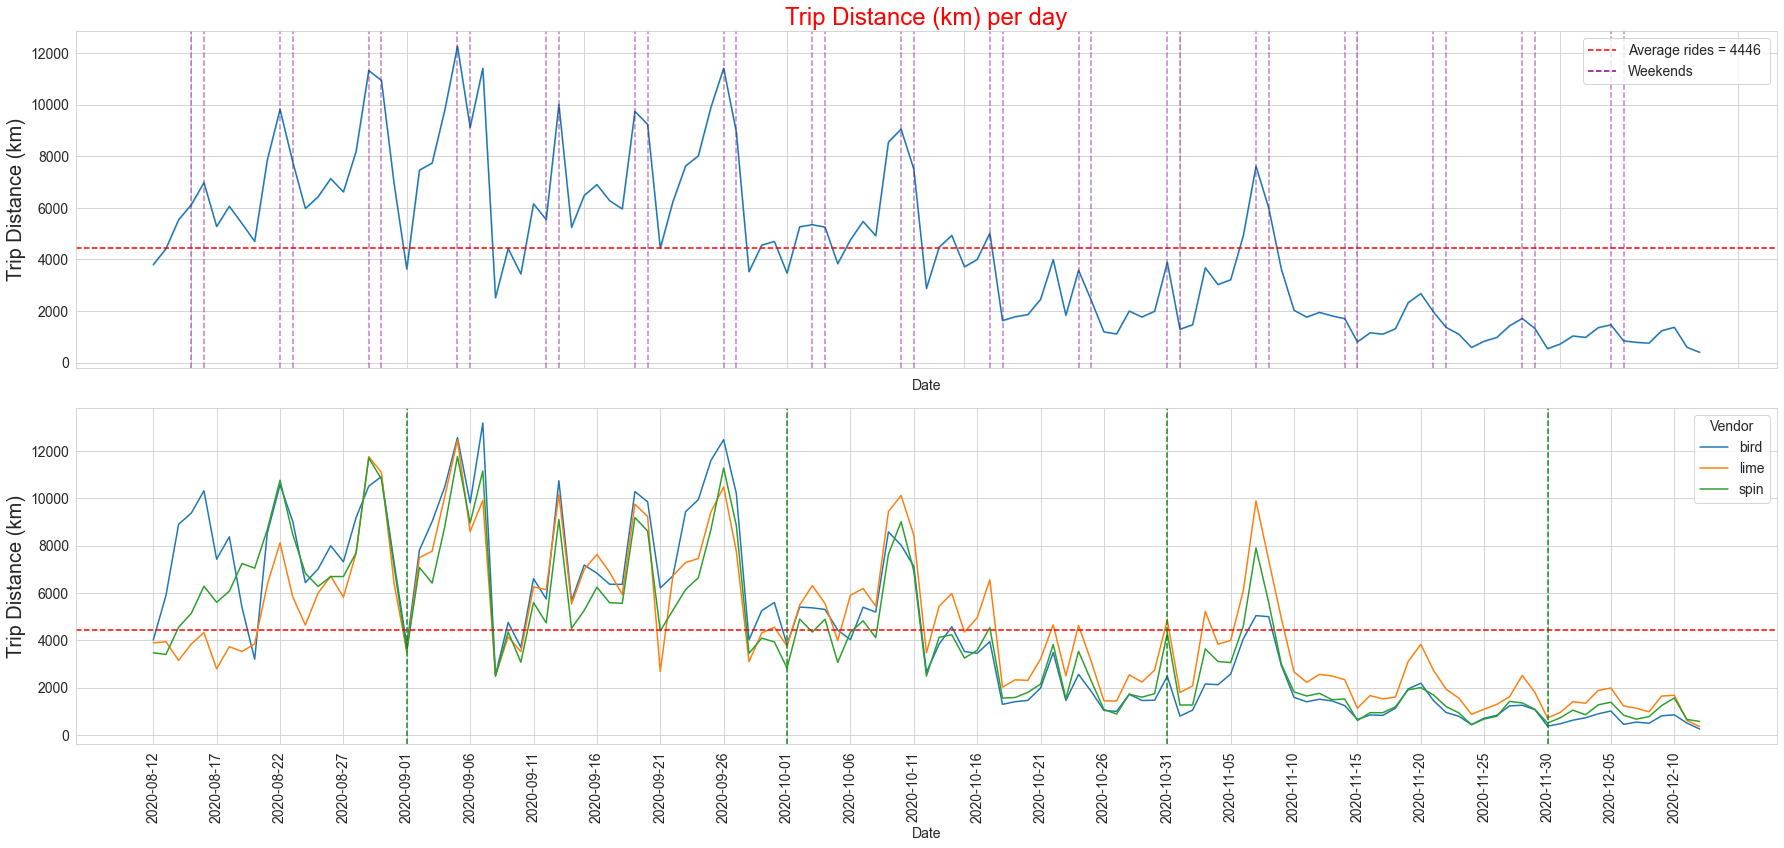

In [71]:
import matplotlib.lines as mlines

# initiating a df grouped by start date.
start_date =df['Start Time'].dt.date
df_by_date = df.groupby([start_date,'Vendor'])['Trip Distance (km)'].agg(['count','sum']).reset_index()
df_by_date.rename(columns={'Start Time':'Date'},inplace=True)

#Calculating avarage trip number
avg_ride_num = int(df_by_date['count'].mean())
avg_ride_distance = int(df_by_date['sum'].mean())
# Ploting Number of rides vs. Date
plt.rcParams.update({'font.size': 14})
plt.rcParams["figure.figsize"] = (25,12)

# plotting:
fig , ax= plt.subplots(2,1)
sns.lineplot(data=df_by_date,x='Date',y='sum',ax=ax[0],ci=False)
sns.lineplot(data=df_by_date,x='Date',y='sum',hue='Vendor',ax=ax[1])
# ax[0].plot(df_by_date['Date'],df_by_date['count'])
ax[0].set_xticklabels([])
ax[0].set_ylabel("Trip Distance (km)",size=20)

#Average Lines
avg_line = ax[0].axhline(df_by_date['sum'].mean(),color='red',ls='--',label=f"Average rides = {avg_ride_distance} ")
avg_line1 = ax[1].axhline(df_by_date['sum'].mean(),color='red',ls='--',label=f"Average rides = {avg_ride_distance} ")

#Drawing weekend lines
for i in np.arange(dt.date(2020,8,15),dt.date(2020,12,10),dt.timedelta(days=7)):
    ax[0].axvline(x=i,c='purple',ls='--',alpha=0.5)

for i in np.arange(dt.date(2020,8,16),dt.date(2020,12,10),dt.timedelta(days=7)):
    ax[0].axvline(x=i,c='purple',ls='--',alpha=0.5)
for i in np.arange(dt.date(2020,9,1), dt.date(2020,12,10), dt.timedelta(days=30)):
    ax[1].axvline(x=i,c='green',ls='--',alpha=0.9)

# Tick & legend customization
ax[1].set_xticks(np.arange(min(df_by_date['Date']),max(df_by_date['Date']),5))
ax[1].set_ylabel("Trip Distance (km)",size=20)
weekends_legend = mlines.Line2D([], [], color='purple', ls='--',markersize=15, label='Weekends')
ax[0].legend(handles=[avg_line,weekends_legend])
ax[0].set_title("Trip Distance (km) per day",color= 'red',size= 24)
plt.xticks(rotation=90)
fig.tight_layout()
plt.show()


## 7- Plotting Number of rides per weekday for each Vendor

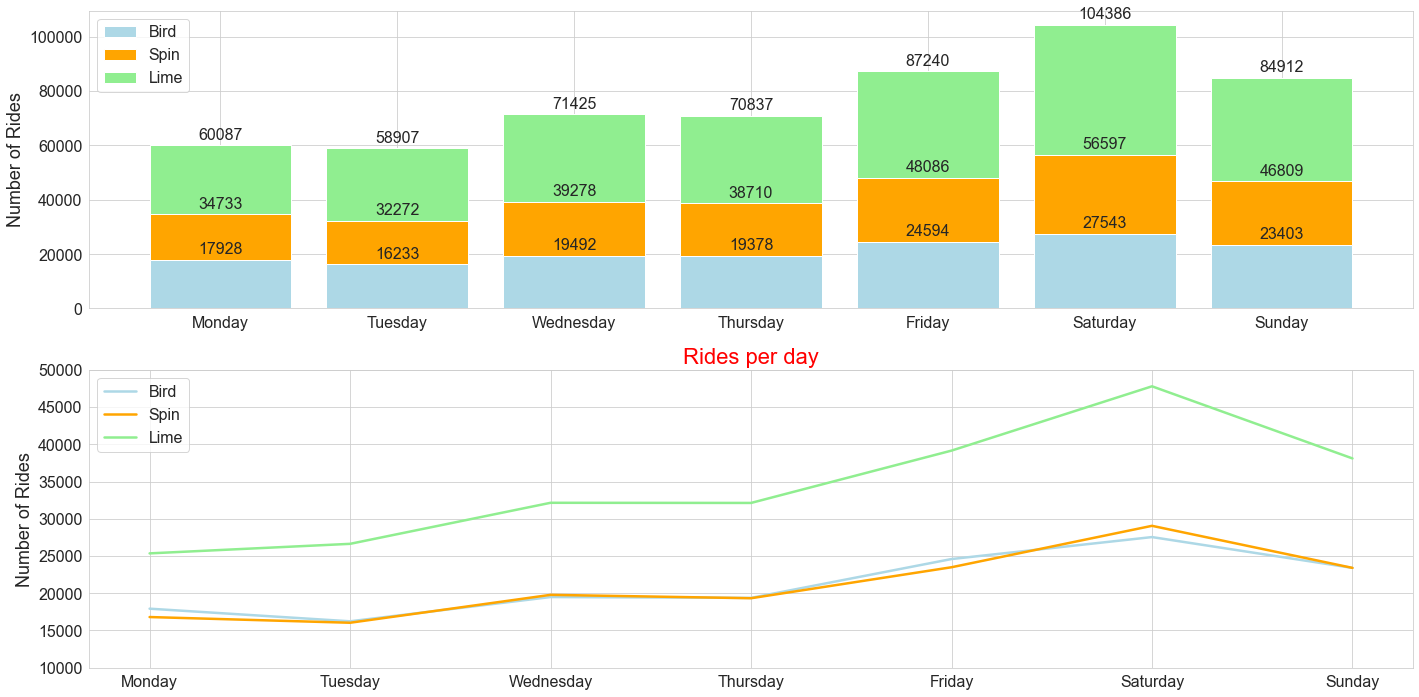

In [17]:
plt.rcParams.update({'font.size': 16})
fig,ax=plt.subplots(2,1)
fig.set_size_inches(20,10)

bird_week = df_by_day[df_by_day['Vendor']=='bird'].set_index('Day').reindex(days).reset_index()
lime_week = df_by_day[df_by_day['Vendor']=='lime'].set_index('Day').reindex(days).reset_index()
spin_week = df_by_day[df_by_day['Vendor']=='spin'].set_index('Day').reindex(days).reset_index()

#First Plot
bird_bar = ax[0].bar(bird_week['Day'],bird_week['Trip ID'],label='Bird',color='lightblue')
spin_bar = ax[0].bar(spin_week['Day'],spin_week['Trip ID'],label='Spin',bottom=bird_week['Trip ID'],color='orange')
lime_bar = ax[0].bar(lime_week['Day'],lime_week['Trip ID'],label='Lime',bottom=np.array(spin_week['Trip ID'])+np.array(bird_week['Trip ID']),color='lightgreen')
ax[0].set_ylabel("Number of Rides",size=18)

#Second Plot
ax[1].plot(bird_week['Day'],bird_week['Trip ID'],c='lightblue',label='Bird',lw=2.5)
ax[1].plot(spin_week['Day'],spin_week['Trip ID'],c='orange',label='Spin',lw=2.5)
ax[1].plot(lime_week['Day'],lime_week['Trip ID'],c='lightgreen',label='Lime',lw=2.5)
ax[1].set_ylabel("Number of Rides",size=18)


ax[0].bar_label(bird_bar, padding=3)
ax[0].bar_label(spin_bar, padding=3)
ax[0].bar_label(lime_bar, padding=3)
ax[0].legend()
ax[1].legend()
plt.ylim(10000,50000)
plt.title("Rides per day",c='r',size=22)

fig.tight_layout()
plt.show()

In [88]:
df['Hour'] = df['Start Time'].dt.hour
df_by_hour = df.groupby('Hour')['Trip ID'].count().reset_index()
df_by_hour.columns = ['Hour','Trip count']
df_by_hour_distance = df.groupby(['Hour','Vendor'])['Trip Distance (km)'].agg(['sum','count']).reset_index()
df_by_hour_distance=df_by_hour_distance.rename(columns={'sum':'Trip Distance (km)','count':'Trip count'})
# print(df_by_hour)
df_by_hour_distance
# df_by_date

,Hour,Vendor,Trip Distance (km),Trip count
0,0,lime,0.716,1
1,0,spin,35.904,14
2,1,lime,0.769,1
3,1,spin,28.285,10
4,2,spin,42.993,7
...,...,...,...,...
59,22,lime,326.462,107
60,22,spin,174.453,44
61,23,bird,8.897,5
62,23,lime,2.909,2


## 8- Barplot for number of trips per hour & trip distance per hour for each Vendor

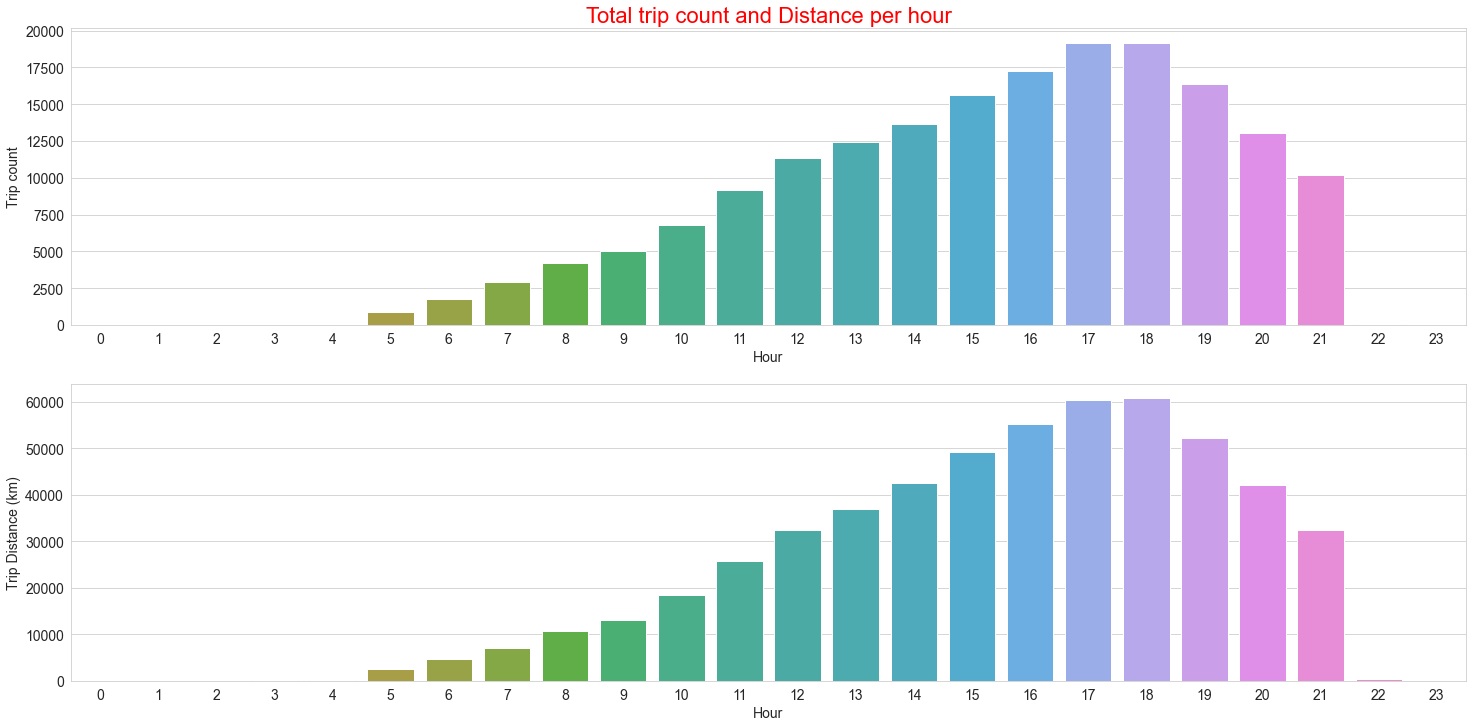

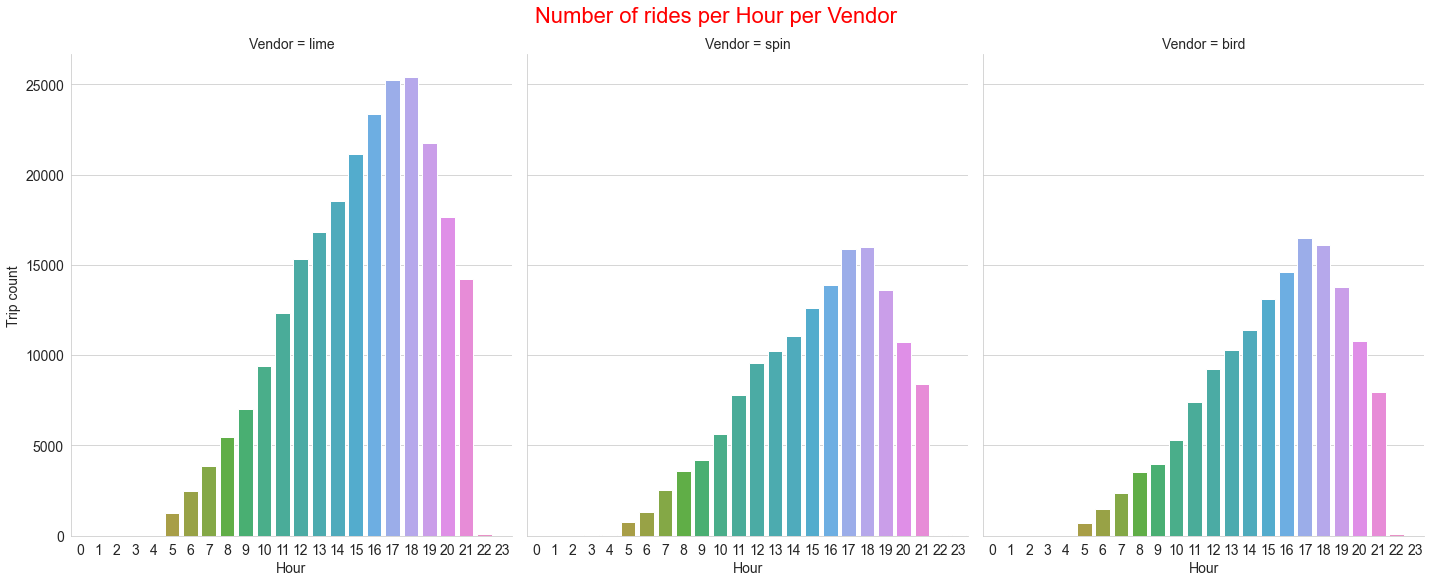

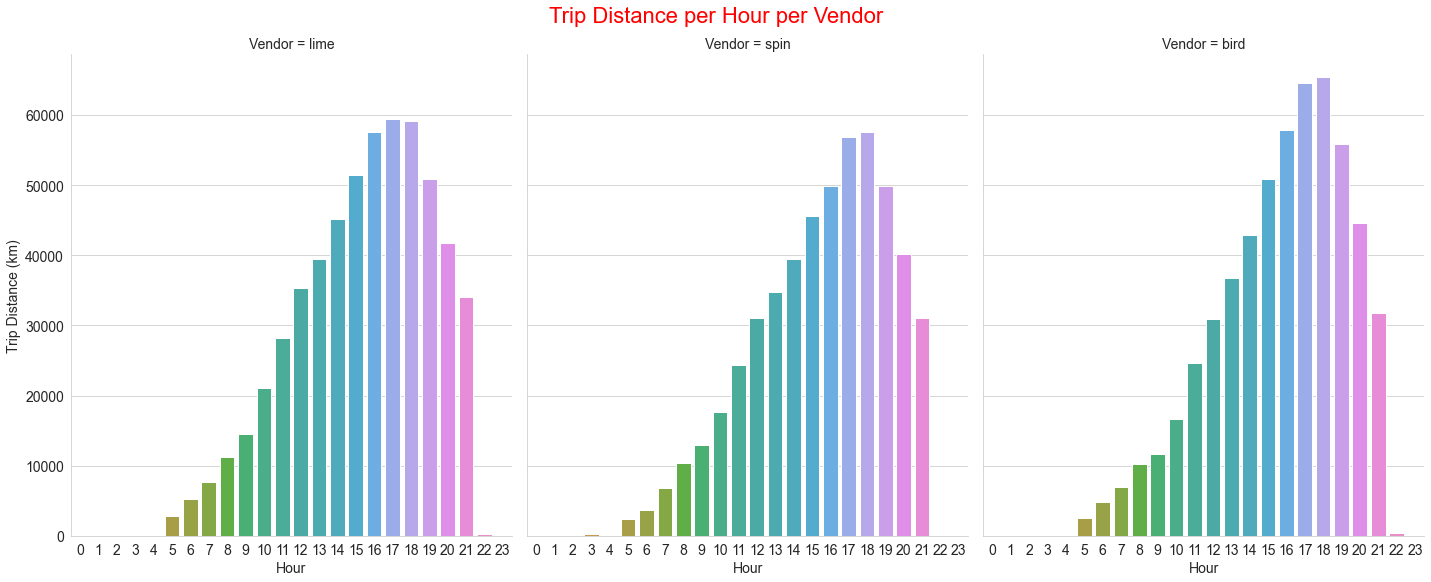

In [97]:
fig,ax = plt.subplots(2,1)
sns.barplot(data=df_by_hour_distance,x='Hour',y='Trip count',ax=ax[0],ci=False)
ax[0].set_title('Total trip count and Distance per hour',c='red',size=22)
sns.barplot(data=df_by_hour_distance,x='Hour',y='Trip Distance (km)',ax=ax[1],ci=False)
cat_count = sns.catplot(data=df_by_hour_distance,x='Hour',y='Trip count',col='Vendor',kind='bar',height=8.27, aspect=6.7/8.27,margin_titles=True)
cat_distance = sns.catplot(data=df_by_hour_distance,x='Hour',y='Trip Distance (km)',col='Vendor',kind='bar',height=8.27, aspect=6.7/8.27)
cat_count.fig.subplots_adjust(top=0.9)
cat_count.fig.suptitle('Number of rides per Hour per Vendor',c='red',size=22)
cat_distance.fig.subplots_adjust(top=0.9)
cat_distance.fig.suptitle('Trip Distance per Hour per Vendor',c='red',size=22)
plt.ylabel('Trip Distance (km)')
plt.show()

We can see that most of the rides were at *17* and *18*.

## 9- Boxplot plotting for Trip Distance , Duration & Hour.

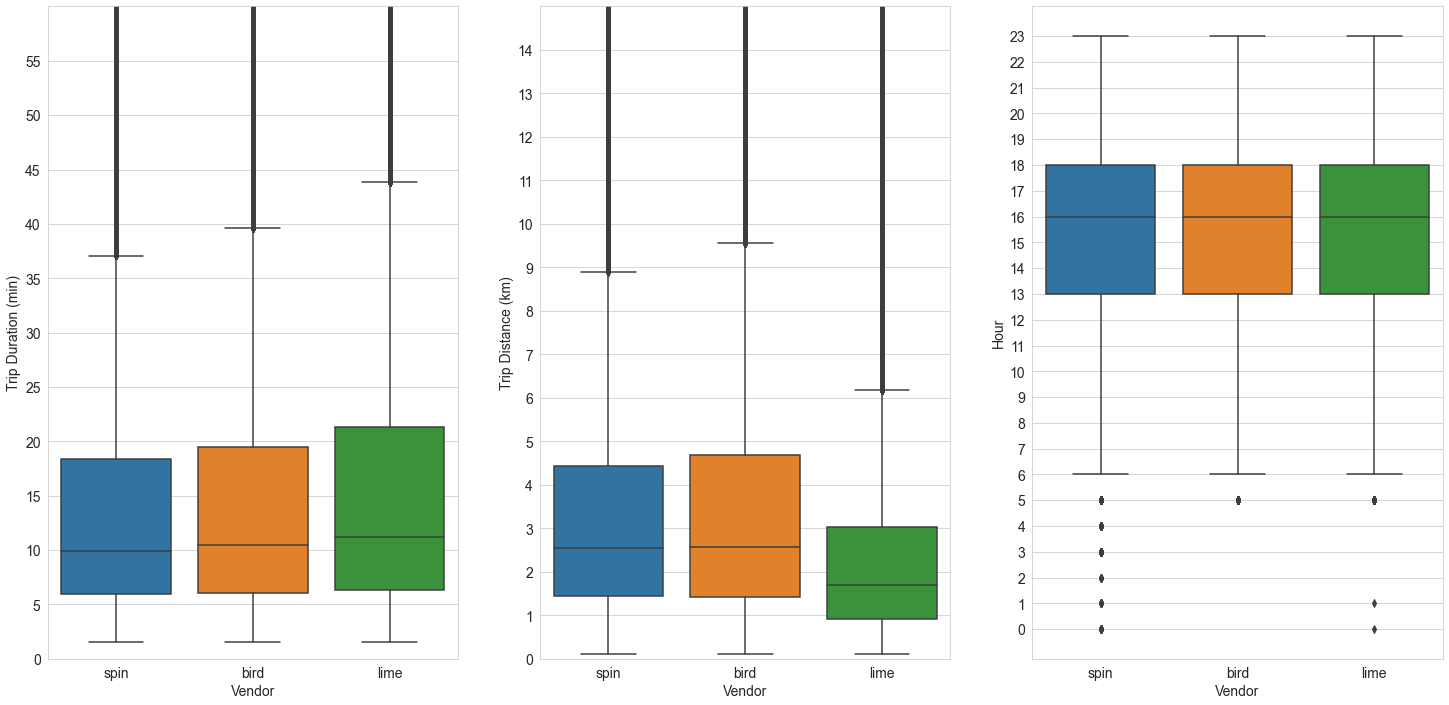

In [85]:
fig,ax=plt.subplots(1,3)

sns.boxplot(data=df,x='Vendor',y='Trip Duration (min)',ax=ax[0])
sns.boxplot(data=df,x='Vendor',y='Trip Distance (km)',ax=ax[1])
sns.boxplot(data=df,x='Vendor',y='Hour',ax=ax[2])
ax[0].set_ylim(0,60)
ax[1].set_ylim(0,15)
ax[0].set_yticks(np.arange(0,60,5))
ax[1].set_yticks(np.arange(0,15,1))
ax[2].set_yticks(np.arange(0,24,1))

plt.show()